# **Machine Learning Week 3 Assignment**
### **Inchara Polepalli Muneshkumar**
**Student ID - 20307270**

**Dataset ID - 6--6-6**

In [ ]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
plt.rcParams["figure.figsize"]=[12,9]

In [ ]:
df = pd.read_csv("/content/drive/My Drive/ML/week3.csv",comment='#',header=None)
print (df.head())
X1 = df.iloc[:,0]
X2 = df.iloc[:,1]
X = np.column_stack((X1,X2))
y = df.iloc[:,2]
df.columns =['X1', 'X2', 'y']

      0     1         2
0  0.06  0.79  0.445329
1  0.94 -0.50 -1.544604
2 -0.06 -0.07 -0.117890
3  0.44  0.51 -0.136431
4 -0.58  0.30 -0.123724


**Question (i)**

**a) Visualizing the downloaded data through a 3D plot**

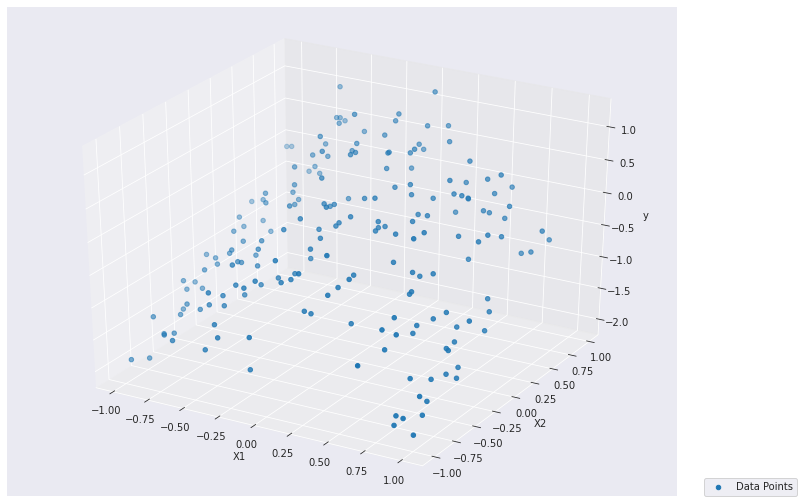

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.scatter(X[:,0],X[:,1],y,label="Data Points")
plt.legend(loc = (1.04,0))


**Question (i)**

**b)Train Lasso Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
Xpoly = PolynomialFeatures(5).fit_transform(X)

In [ ]:
C_range = [0.1, 1, 10, 100,1000]
error_for_lasso=[]

In [ ]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
def lasso(c):
  model = Lasso(alpha=1/c)
  model.fit(Xpoly, y)
  ypred = model.predict(Xpoly)
  print("The LassoRegression model intercept is %s and model coefficients are %s"% (model.intercept_, model.coef_))
  error = mean_squared_error(y,ypred)
  print("The LassoRegression model error is",error)
  return model,error

In [ ]:
lasso_model1,lasso_model_error1 = lasso(0.1)
error_for_lasso.append(lasso_model_error1)

The LassoRegression model intercept is -0.4061957863338966 and model coefficients are [ 0. -0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0.
  0. -0.  0.]
The LassoRegression model error is 0.5211459303376431


In [ ]:
lasso_model2,lasso_model_error2 = lasso(1)
error_for_lasso.append(lasso_model_error2)

The LassoRegression model intercept is -0.4061957863338966 and model coefficients are [ 0. -0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0.
  0. -0.  0.]
The LassoRegression model error is 0.5211459303376431


In [ ]:
lasso_model3,lasso_model_error3 = lasso(10)
error_for_lasso.append(lasso_model_error3)

The LassoRegression model intercept is -0.3337616165230409 and model coefficients are [ 0.         -0.          0.79542327 -0.11498909  0.         -0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.          0.         -0.
  0.         -0.          0.        ]
The LassoRegression model error is 0.1525042673553435


In [ ]:
lasso_model4,lasso_model_error4 = lasso(100)
error_for_lasso.append(lasso_model_error4)

The LassoRegression model intercept is -0.022230002079711042 and model coefficients are [ 0.         -0.          1.01050534 -0.95585708 -0.         -0.
 -0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.          0.         -0.
  0.         -0.          0.        ]
The LassoRegression model error is 0.03634985755683865


In [ ]:
lasso_model5,lasso_model_error5 = lasso(1000)
error_for_lasso.append(lasso_model_error5)

The LassoRegression model intercept is 0.008040675281836274 and model coefficients are [ 0.00000000e+00  1.69898903e-02  1.00131683e+00 -1.01026476e+00
 -2.46488014e-02 -5.50315600e-04  0.00000000e+00 -0.00000000e+00
 -3.14982333e-02  0.00000000e+00 -3.32064898e-02  0.00000000e+00
  0.00000000e+00 -2.64435853e-02 -0.00000000e+00 -3.28771173e-02
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  7.41093498e-02]
The LassoRegression model error is 0.034441854897358945


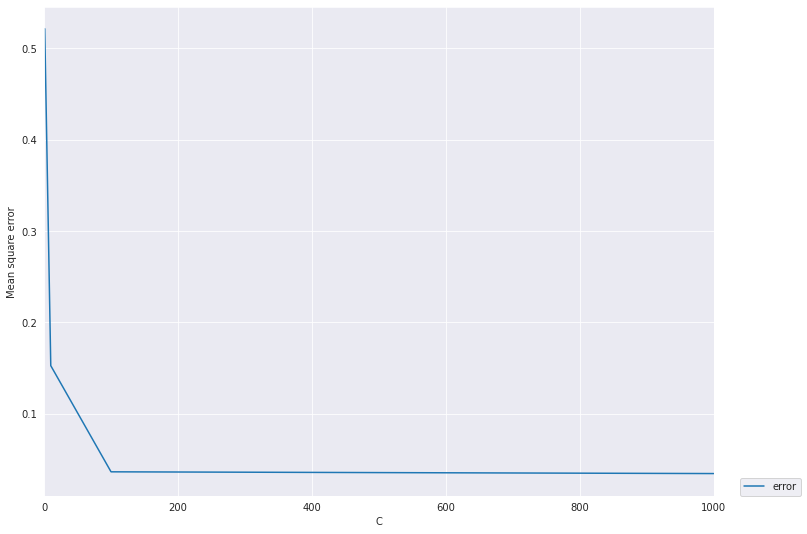

In [ ]:
plt.errorbar(C_range,error_for_lasso,label="error")
plt.xlabel('C')
plt.ylabel('Mean square error')
plt.xlim((0,1000))
plt.legend(loc = (1.04,0))
plt.show()

**Question (i)**

**c) Predict values using lasso regression and plot predictions**

In [ ]:
Xtest = []
grid = np.linspace(-3,3)
for i in grid:
  for j in grid:
    Xtest.append([i,j])
Xtest = np.array(Xtest)

In [ ]:
print(Xtest)

[[-3.         -3.        ]
 [-3.         -2.87755102]
 [-3.         -2.75510204]
 ...
 [ 3.          2.75510204]
 [ 3.          2.87755102]
 [ 3.          3.        ]]


In [ ]:
Xpoly_test = PolynomialFeatures(5).fit_transform(Xtest)

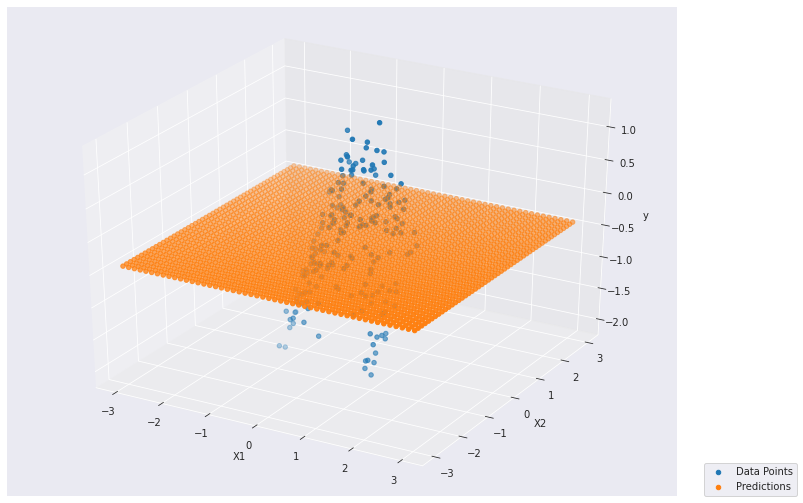

In [ ]:
lasso_model1_prediction = lasso_model1.predict(Xpoly_test)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.scatter(X[:,0],X[:,1],y,label="Data Points")
ax.scatter(Xtest[:,0], Xtest[:,1], lasso_model1_prediction,label="Predictions")
plt.legend(loc = (1.04,0))

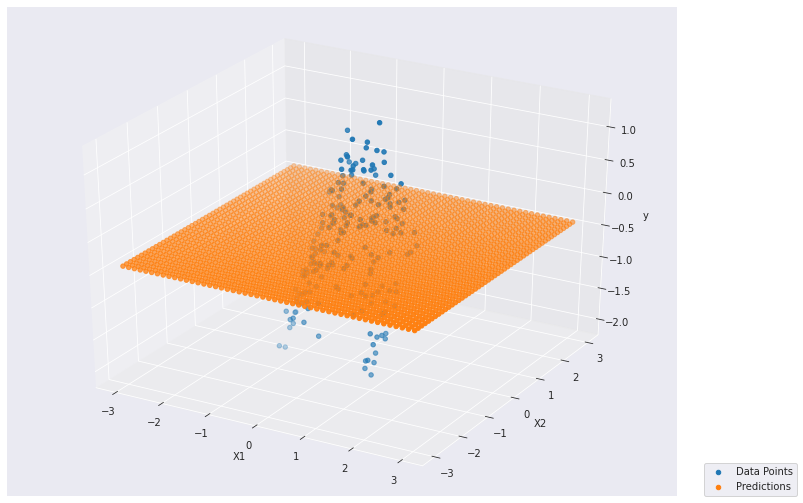

In [ ]:
lasso_model2_prediction = lasso_model2.predict(Xpoly_test)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.scatter(X[:,0],X[:,1],y,label="Data Points")
ax.scatter(Xtest[:,0], Xtest[:,1], lasso_model2_prediction,label="Predictions")
plt.legend(loc = (1.04,0))

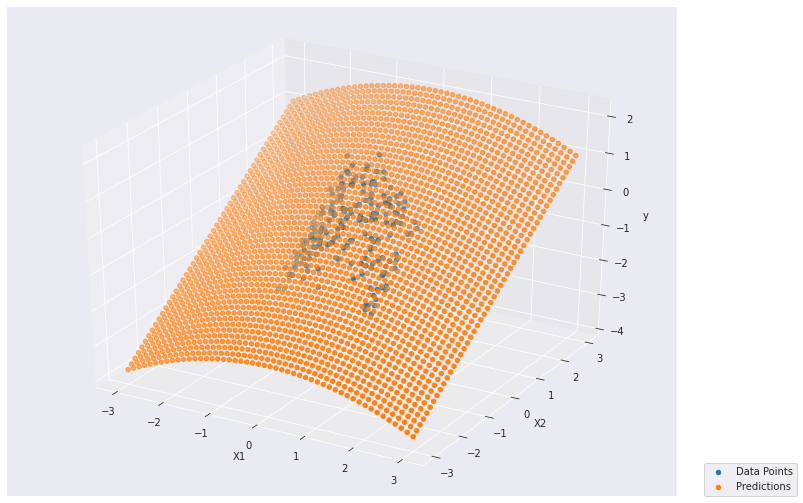

In [ ]:
lasso_model3_prediction = lasso_model3.predict(Xpoly_test)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.scatter(X[:,0],X[:,1],y,label="Data Points")
ax.scatter(Xtest[:,0], Xtest[:,1], lasso_model3_prediction,label="Predictions")
plt.legend(loc = (1.04,0))

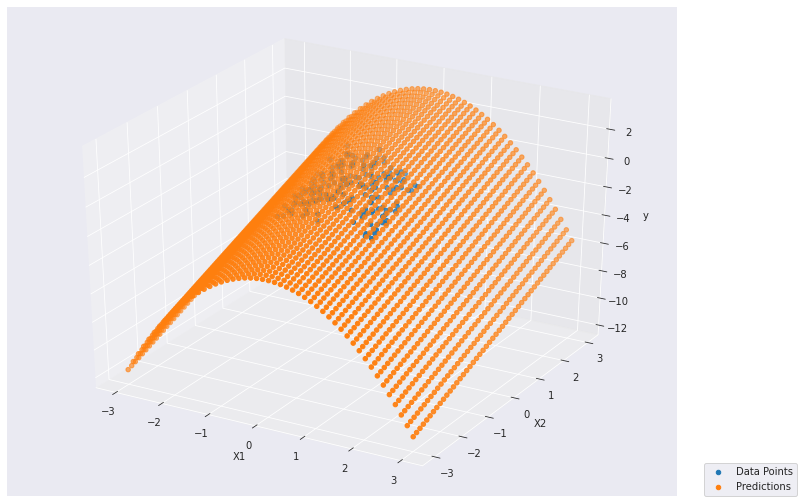

In [ ]:
lasso_model4_prediction = lasso_model4.predict(Xpoly_test)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.scatter(X[:,0],X[:,1],y,label="Data Points")
ax.scatter(Xtest[:,0], Xtest[:,1], lasso_model4_prediction,label="Predictions")
plt.legend(loc = (1.04,0))

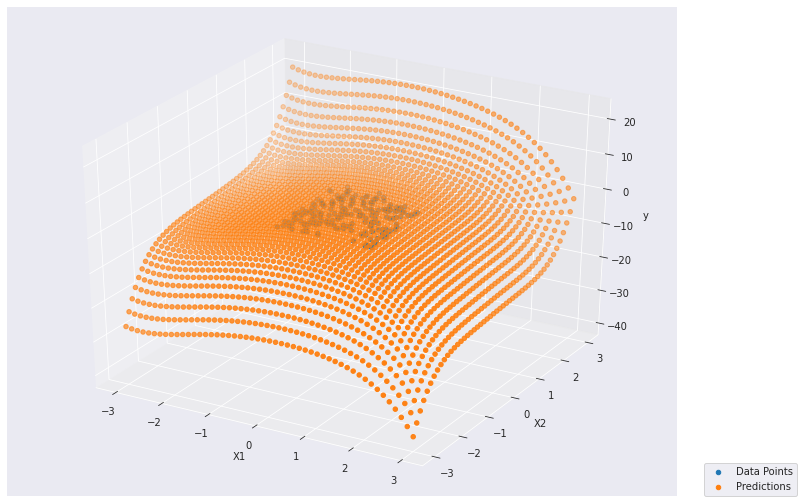

In [ ]:
lasso_model5_prediction = lasso_model5.predict(Xpoly_test)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.scatter(X[:,0],X[:,1],y,label="Data Points")
ax.scatter(Xtest[:,0], Xtest[:,1], lasso_model5_prediction,label="Predictions")
plt.legend(loc = (1.04,0))

**Question (i)**

**e) Ridge Regression**

In [ ]:
def ridge(c):
  model = Ridge(alpha=1/(2*c))
  model.fit(Xpoly, y)
  ypred = model.predict(Xpoly)
  print("The RidgeRegression model intercept is %s and model coefficients are %s"% (model.intercept_, model.coef_))
  error = mean_squared_error(y,ypred)
  print("The RidgeRegression model error is",error)
  return model,error

In [ ]:
error_for_ridge=[]
ridge_model1,ridge_model_error1 = ridge(0.1)
error_for_ridge.append(ridge_model_error1)

The RidgeRegression model intercept is -0.07240969964885996 and model coefficients are [ 0.00000000e+00  2.72108158e-02  7.76362536e-01 -5.43866582e-01
 -4.13781727e-02  8.88118178e-03  4.20077088e-04  1.21413807e-01
 -1.52288210e-02  2.11412796e-01 -3.92349764e-01  3.15034241e-02
 -6.47876367e-02 -3.36911903e-02  3.65245952e-02 -4.27956737e-02
  4.06782720e-02 -1.40879281e-02 -3.01247666e-02 -9.78671635e-04
  8.88550703e-02]
The RidgeRegression model error is 0.04007727488477938


In [ ]:
ridge_model2,ridge_model_error2 = ridge(0.5)
error_for_ridge.append(ridge_model_error2)

The RidgeRegression model intercept is -0.01964501082292175 and model coefficients are [ 0.          0.02673477  0.91683612 -0.73508658 -0.0700666  -0.04166227
  0.05531114  0.07444825 -0.04912204  0.11974614 -0.31379316  0.10470294
 -0.01723652 -0.08832469  0.04532024 -0.08672951  0.01007415 -0.01071929
 -0.14107187 -0.0299824   0.07108344]
The RidgeRegression model error is 0.034646379117811175


In [ ]:
ridge_model3,ridge_model_error3 = ridge(1)
error_for_ridge.append(ridge_model_error3)

The RidgeRegression model intercept is -0.0022312040778000863 and model coefficients are [ 0.          0.01873163  0.95396917 -0.8248873  -0.0799888  -0.06384252
  0.10995209  0.05803383 -0.06327405  0.0522953  -0.23668939  0.13885424
 -0.00357599 -0.12191185  0.05055791 -0.1360868   0.02850691  0.00824071
 -0.18469397 -0.05739673  0.10905503]
The RidgeRegression model error is 0.03386675417489493


In [ ]:
ridge_model4,ridge_model_error4 = ridge(10)
error_for_ridge.append(ridge_model_error4)

The RidgeRegression model intercept is 0.02876642713832761 and model coefficients are [ 0.         -0.05662284  1.07275216 -1.01865736 -0.08380467 -0.12133829
  0.47973495 -0.04983874 -0.08324383 -0.34611722 -0.03185122  0.18219436
  0.00178504 -0.18943958  0.09889162 -0.47528406  0.16926783  0.10574068
 -0.25561324 -0.15269851  0.44379395]
The RidgeRegression model error is 0.03268531935178618


In [ ]:
ridge_model5,ridge_model_error5 = ridge(100)
error_for_ridge.append(ridge_model_error5)

The RidgeRegression model intercept is 0.035812500171510386 and model coefficients are [ 0.         -0.10606495  1.13656513 -1.06143229 -0.08339379 -0.1562583
  0.70301277 -0.12065771 -0.09439952 -0.59124123  0.01863329  0.18172916
  0.01080705 -0.18708028  0.14485417 -0.67374333  0.23204497  0.1356068
 -0.22516973 -0.15454854  0.65641835]
The RidgeRegression model error is 0.032538058996586766


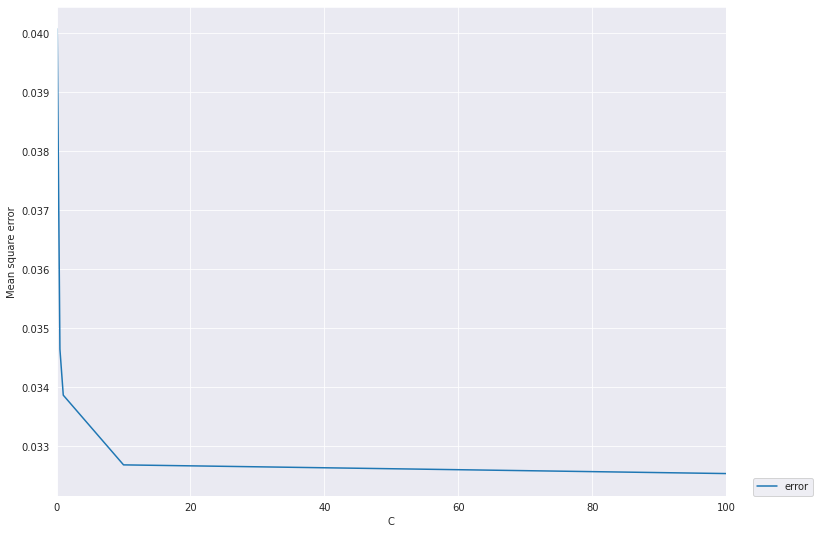

In [ ]:
C_range_ridge = [0.1,0.5, 1, 10, 100]
plt.errorbar(C_range_ridge,error_for_ridge,label="error")
plt.xlabel('C'); plt.ylabel('Mean square error')
plt.xlim((0,100))
plt.legend(loc = (1.04,0))
plt.show()

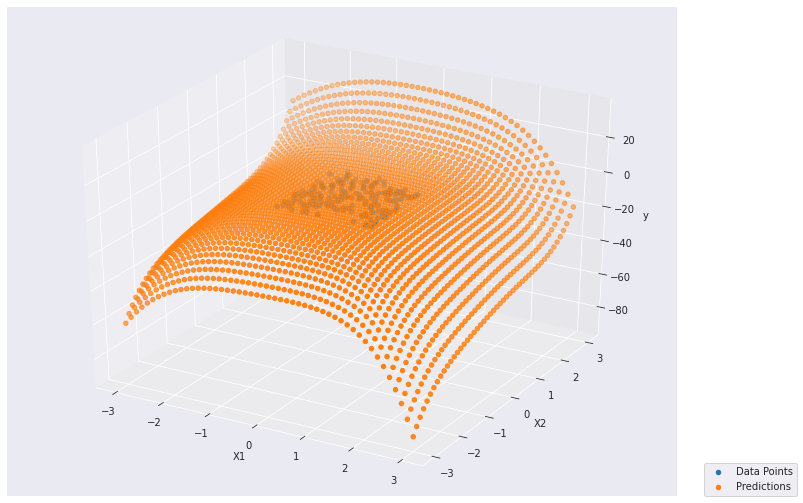

In [ ]:
ridge_model1_prediction = ridge_model1.predict(Xpoly_test)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.scatter(X[:,0],X[:,1],y,label="Data Points")
ax.scatter(Xtest[:,0], Xtest[:,1], ridge_model1_prediction,label="Predictions")
plt.legend(loc = (1.04,0))

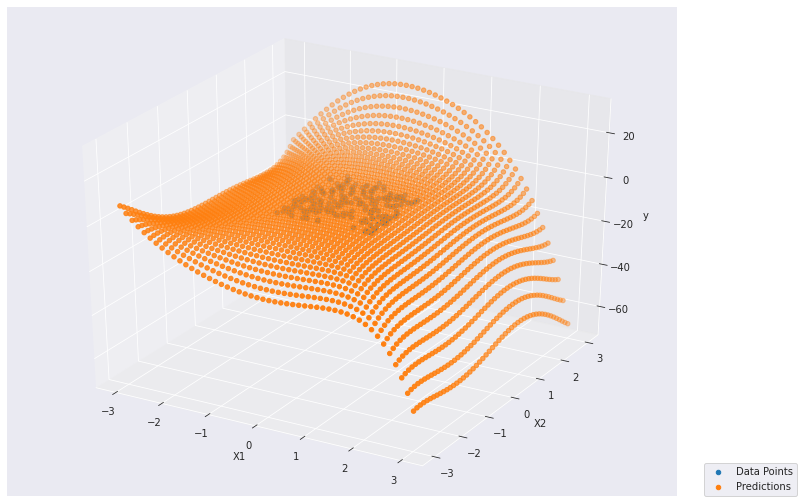

In [ ]:
ridge_model2_prediction = ridge_model2.predict(Xpoly_test)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.scatter(X[:,0],X[:,1],y,label="Data Points")
ax.scatter(Xtest[:,0], Xtest[:,1], ridge_model2_prediction,label="Predictions")
plt.legend(loc = (1.04,0))

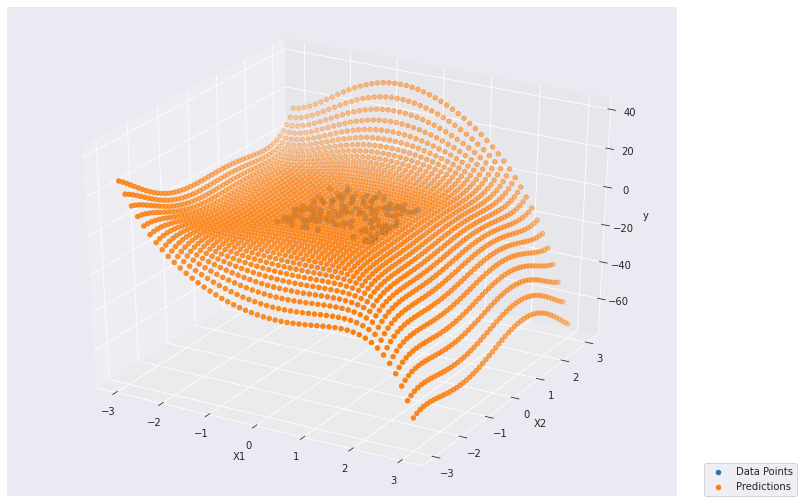

In [ ]:
ridge_model3_prediction = ridge_model3.predict(Xpoly_test)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.scatter(X[:,0],X[:,1],y,label="Data Points")
ax.scatter(Xtest[:,0], Xtest[:,1], ridge_model3_prediction,label="Predictions")
plt.legend(loc = (1.04,0))

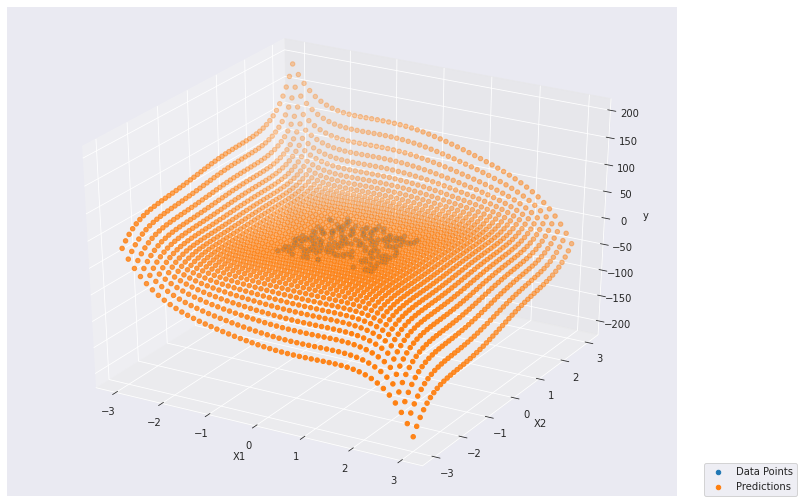

In [ ]:
ridge_model4_prediction = ridge_model4.predict(Xpoly_test)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.scatter(X[:,0],X[:,1],y,label="Data Points")
ax.scatter(Xtest[:,0], Xtest[:,1], ridge_model4_prediction,label="Predictions")
plt.legend(loc = (1.04,0))

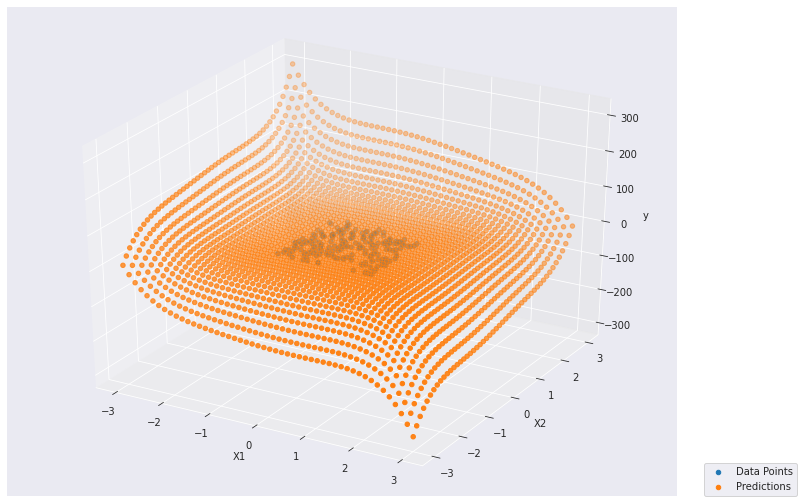

In [ ]:
ridge_model5_prediction = ridge_model5.predict(Xpoly_test)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.scatter(X[:,0],X[:,1],y,label="Data Points")
ax.scatter(Xtest[:,0], Xtest[:,1], ridge_model5_prediction,label="Predictions")
plt.legend(loc = (1.04,0))

**Question (ii)**

**a) Cross Validation**

In [ ]:
c=1
lasso_model_for_cv = Lasso(alpha=1/c)

In [ ]:
model = Lasso(alpha=1)
mean_error=[]
std_error=[]
var_error=[]

In [ ]:
def cross_val (folds):
  temp=[]
  kf = KFold(n_splits=folds)
  for train, test in kf.split(Xpoly):
    model.fit(Xpoly[train], y[train])
    ypred = model.predict(Xpoly[test])
  score = metrics.accuracy_score(y,predictions)
  std_error.append(np.array(temp).std())
  var_error.append(np.array(temp).var())
  print("The LassoRegression has intercept %s and model coefficients are %s"% (model.intercept_, model.coef_))
  print("The LassoRegression has error",np.array(temp).mean())

In [ ]:
cross_val(2)

The LassoRegression has intercept -0.396867292277578 and model coefficients are [ 0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0.
  0. -0.  0.]
The LassoRegression has error 0.5214916088796023


In [ ]:
cross_val(5)

The LassoRegression has intercept -0.406144424887939 and model coefficients are [ 0. -0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0.
  0. -0.  0.]
The LassoRegression has error 0.521705208801518


In [ ]:
cross_val(10)

The LassoRegression has intercept -0.400037076308741 and model coefficients are [ 0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0.
  0. -0.  0.]
The LassoRegression has error 0.5250837636968313


In [ ]:
cross_val(25)

The LassoRegression has intercept -0.401342269192906 and model coefficients are [ 0. -0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0.
  0. -0.  0.]
The LassoRegression has error 0.5268578817060205


In [ ]:
cross_val(50)

The LassoRegression has intercept -0.40651272092186047 and model coefficients are [ 0. -0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0.
  0. -0.  0.]
The LassoRegression has error 0.5245951445656337


In [ ]:
cross_val(100)

The LassoRegression has intercept -0.40437584872982135 and model coefficients are [ 0. -0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0.
  0. -0.  0.]
The LassoRegression has error 0.5250854715314403


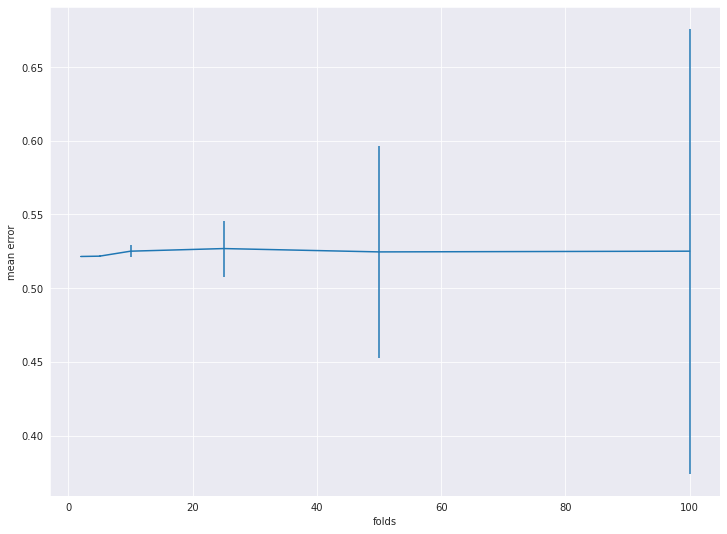

In [ ]:
fold=[2,5,10,25,50,100]
plt.errorbar(fold,mean_error,yerr=var_error)
plt.xlabel('folds')
plt.ylabel('mean error')
plt.show()

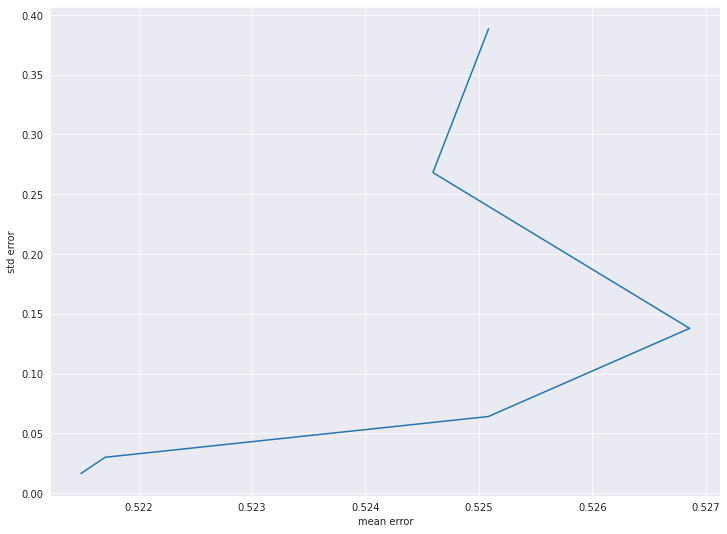

In [ ]:
plt.errorbar(mean_error,std_error)
plt.xlabel('mean error')
plt.ylabel('std error')
plt.show()

**Question (ii)**

**b) Lasso Regression with varying C**

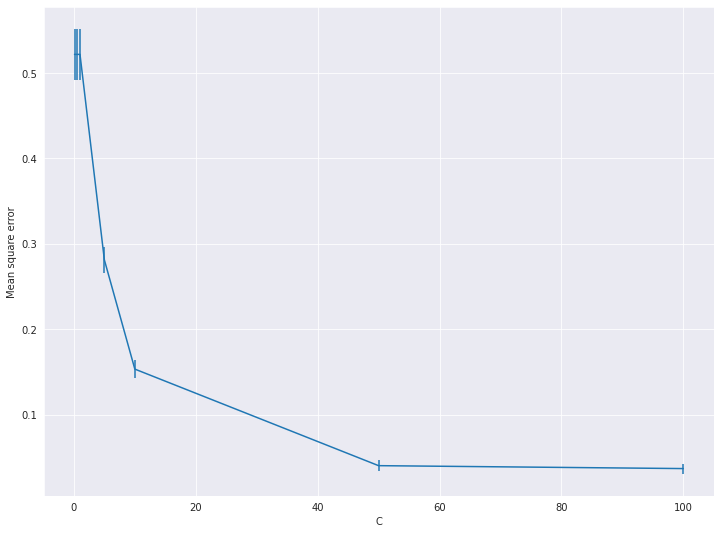

In [ ]:
mean_error_varying_c=[]
std_error_varying_c=[]
Ci_range_varying_c = [0.1, 0.5, 1, 5, 10, 50, 100]
for Ci_varying_c in Ci_range_varying_c:
  model_varying_c = Lasso(alpha=1/Ci_varying_c)
  temp_varying_c=[]
  kf = KFold(n_splits=5)
  for train, test in kf.split(Xpoly):
    model_varying_c.fit(Xpoly[train], y[train])
    ypred_varying_c = model_varying_c.predict(Xpoly[test])
    temp_varying_c.append(mean_squared_error(y[test],ypred_varying_c))
  mean_error_varying_c.append(np.array(temp_varying_c).mean())
  std_error_varying_c.append(np.array(temp_varying_c).std())
plt.errorbar(Ci_range_varying_c, mean_error_varying_c, yerr=std_error_varying_c)
plt.xlabel('C'); plt.ylabel('Mean square error')
plt.show()

**Question (ii)**

**d) Ridge Regression with varying C**

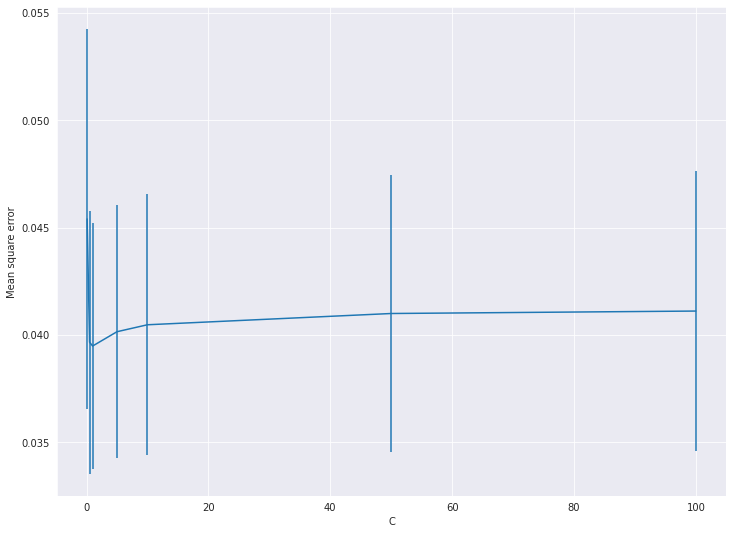

In [ ]:
mean_error_varying_c_ridge=[]
std_error_varying_c_ridge=[]
Ci_range_varying_c_ridge = [0.1, 0.5, 1, 5, 10, 50, 100]
for Ci_varying_c_ridge in Ci_range_varying_c_ridge:
  model_varying_c_ridge = Ridge(alpha=1/(2*Ci_varying_c_ridge))
  temp_varying_c_ridge=[]
  kf_ridge = KFold(n_splits=5)
  for train, test in kf_ridge.split(Xpoly):
    model_varying_c_ridge.fit(Xpoly[train], y[train])
    ypred_varying_c_ridge = model_varying_c_ridge.predict(Xpoly[test])
    temp_varying_c_ridge.append(mean_squared_error(y[test],ypred_varying_c_ridge))
  mean_error_varying_c_ridge.append(np.array(temp_varying_c_ridge).mean())
  std_error_varying_c_ridge.append(np.array(temp_varying_c_ridge).std())
plt.errorbar(Ci_range_varying_c_ridge, mean_error_varying_c_ridge, yerr=std_error_varying_c_ridge)
plt.xlabel('C'); plt.ylabel('Mean square error')
plt.show()

**Converting the notebook to PDF**

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
!jupyter nbconvert --to PDF "/content/drive/My Drive/Colab Notebooks/ML_Assignment_Week3.ipynb"